# The Billionaire’s Data-Driven Will (Beginner Visualization Project)

## Problem Statement

A billionaire with a global business empire wants his legacy to be guided by evidence, not sentiment. As he prepares his will, he refuses to rely on family politics or gut instinct. For years he has tracked detailed data on his nuclear and extended family as well as his most loyal long-serving employees—capturing factors such as financial responsibility, past contributions, loyalty, and leadership potential.

The challenge is to analyze this information and build a transparent, defensible framework for distributing his wealth and appointing key stewards of his assets. The analysis must highlight patterns, rank potential heirs and managers, and provide clear visual evidence that supports each recommendation. The goal is to move from an emotional, subjective process to a quantitative decision, ensuring his fortune is managed responsibly and his legacy preserved worldwide.


## Datasets & Column Meanings

### `people.csv` — Observations about potential heirs and trusted employees
| Column | Meaning |
|---|---|
| **person_id** | Unique identifier for each person. |
| **name** | First and last name. |
| **group** | Relationship to the billionaire: `nuclear_family`, `extended_family`, or `employee`. |
| **age** | Age in years. |
| **country** | Country of residence. |
| **financial_responsibility** | Score (0–100) for how reliably they handle money. |
| **loyalty_score** | Score (0–100) for dedication and trustworthiness. |
| **leadership_potential** | Score (0–100) estimating ability to run companies or major assets. |
| **philanthropy_alignment** | Score (0–100) for how well their values match the billionaire’s giving goals. |
| **legal_flags** | 0 = clean record, 1 = some legal issue present. |

### `assets_updated.csv` — The billionaire’s portfolio of major assets
| Column | Meaning |
|---|---|
| **asset_id** | Unique identifier for each asset. |
| **asset_name** | Descriptive name of the asset. |
| **asset_type** | Category of the asset: `cash`, `stocks`, `real_estate`, `business_unit`, or `art_collection`. |
| **region** | Global region of the asset: `North America`, `Europe`, `Africa`, `Asia`, or `Latin America`. |
| **current_value_million_usd** | Estimated value **in millions of US dollars**. |
| **risk_level** | Overall investment risk: `Low`, `Medium`, or `High`. |
| **liquidity** | How easily the asset can be converted to cash: `High`, `Medium`, or `Low`. |
| **mgmt_expertise_required** | 1 if the asset needs active management; 0 if it can be passively held. |

## Load Libraries and Data Set

In [1]:
import pandas as pd # data manipulation
import numpy as np # mathematical calculations
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

In [2]:
people_df = pd.read_csv('people.csv')
asset_df = pd.read_csv('assets_updated.csv')

In [ ]:
print()
display(people_df.head())
print()
display(asset_df.head())

,person_id,name,group,age,country,financial_responsibility,loyalty_score,leadership_potential,philanthropy_alignment,legal_flags
0,1,Olivia Carter,employee,56,UK,91,68,44,90,0
1,2,Marcus Langley,nuclear_family,75,Brazil,58,62,53,32,0
2,3,Rebecca Ortiz,nuclear_family,19,India,63,83,59,67,0
3,4,Daniel Smith,nuclear_family,77,UK,60,72,87,51,0
4,5,Priya Patel,employee,42,South Africa,88,66,88,71,0


,asset_id,asset_name,asset_type,region,current_value_million_usd,risk_level,liquidity,mgmt_expertise_required
0,1,Global Tech Stocks,stocks,Asia,144.06,Medium,Medium,1
1,2,Paris Luxury Hotel,stocks,Europe,74.76,Medium,High,1
2,3,Kenyan Tea Plantation,cash,Asia,41.90,Low,Medium,1
3,4,Silicon Valley Startup Shares,real_estate,Latin America,387.26,Medium,High,0
4,5,Dubai Art Collection,business_unit,Latin America,7.73,Low,Medium,1


### Quickly explore the data

In [ ]:
# check if there are any null values and data type in each column of our dataset 
people_df.info()   # 15 rows and 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   person_id                 15 non-null     int64 
 1   name                      15 non-null     object
 2   group                     15 non-null     object
 3   age                       15 non-null     int64 
 4   country                   15 non-null     object
 5   financial_responsibility  15 non-null     int64 
 6   loyalty_score             15 non-null     int64 
 7   leadership_potential      15 non-null     int64 
 8   philanthropy_alignment    15 non-null     int64 
 9   legal_flags               15 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 1.3+ KB


In [ ]:
asset_df.info()   # 10 rows and 8 columns 
                    # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   asset_id                   10 non-null     int64  
 1   asset_name                 10 non-null     object 
 2   asset_type                 10 non-null     object 
 3   region                     10 non-null     object 
 4   current_value_million_usd  10 non-null     float64
 5   risk_level                 10 non-null     object 
 6   liquidity                  10 non-null     object 
 7   mgmt_expertise_required    10 non-null     int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 768.0+ bytes


In [ ]:
# check for duplicate values
people_df.duplicated().sum()   # no duplicates

0

In [ ]:
asset_df.duplicated().sum()   # no duplicate values

0

In [ ]:
# selecting columns with the object/string data type
people_df.select_dtypes(include = 'object')

,name,group,country
0,Olivia Carter,employee,UK
1,Marcus Langley,nuclear_family,Brazil
2,Rebecca Ortiz,nuclear_family,India
3,Daniel Smith,nuclear_family,UK
4,Priya Patel,employee,South Africa
5,Li Wei,nuclear_family,Australia
6,Amara Okafor,extended_family,USA
7,Carlos Mendes,nuclear_family,UK
8,Fatima Zahra,nuclear_family,India
9,John Doe,employee,Australia


In [16]:
numeric_columns = people_df.select_dtypes(exclude= 'object')
numeric_columns

,person_id,age,financial_responsibility,loyalty_score,leadership_potential,philanthropy_alignment,legal_flags
0,1,56,91,68,44,90,0
1,2,75,58,62,53,32,0
2,3,19,63,83,59,67,0
3,4,77,60,72,87,51,0
4,5,42,88,66,88,71,0
5,6,77,55,54,91,91,0
6,7,68,83,94,93,32,1
7,8,24,60,48,68,47,1
8,9,77,53,89,38,82,0
9,10,45,86,99,100,73,0


In [21]:
object_columns = numeric_columns[['age', 'financial_responsibility',	'loyalty_score', 'leadership_potential', 'philanthropy_alignment','legal_flags']]
object_columns

,age,financial_responsibility,loyalty_score,leadership_potential,philanthropy_alignment,legal_flags
0,56,91,68,44,90,0
1,75,58,62,53,32,0
2,19,63,83,59,67,0
3,77,60,72,87,51,0
4,42,88,66,88,71,0
5,77,55,54,91,91,0
6,68,83,94,93,32,1
7,24,60,48,68,47,1
8,77,53,89,38,82,0
9,45,86,99,100,73,0


In [ ]:
# descriptive statistics of our numeric columns in our people_df data frame and then transpose the result
object_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15.0,52.533333,21.266562,19.0,38.5,56.0,71.5,77.0
financial_responsibility,15.0,68.333333,15.069679,45.0,57.5,63.0,84.5,91.0
loyalty_score,15.0,73.600000,17.070442,48.0,58.0,72.0,87.5,99.0
leadership_potential,15.0,70.333333,21.750753,33.0,56.0,68.0,89.5,100.0
philanthropy_alignment,15.0,67.400000,20.109699,32.0,52.0,71.0,82.5,91.0
legal_flags,15.0,0.200000,0.414039,0.0,0.0,0.0,0.0,1.0


In [ ]:
# descriptive statistics of our numeric columns in our asset_df data frame and then transpose the result
asset_df[['current_value_million_usd', 'mgmt_expertise_required']].describe().T

,count,mean,std,min,25%,50%,75%,max
current_value_million_usd,10.0,218.085,158.699176,7.73,92.085,175.615,378.8075,432.24
mgmt_expertise_required,10.0,0.600,0.516398,0.00,0.000,1.000,1.0000,1.00


## Explore more and Visualize

Peoples Data set age distribution

In [ ]:
people_df['age'] 

0     56
1     75
2     19
3     77
4     42
5     77
6     68
7     24
8     77
9     45
10    64
11    19
12    35
13    48
14    62
Name: age, dtype: int64

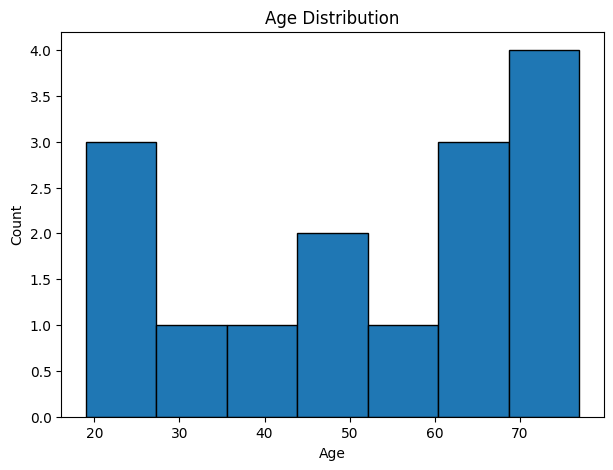

In [ ]:
#Plot a histogram of the Age column from people_df with 7 bins to better understand the distribution of ages in the dataset
plt.figure(figsize=(7, 5))
plt.hist(people_df['age'], bins=7, edgecolor='black') 
plt.title("Age Distribution")
plt.ylabel("Count")
plt.xlabel("Age")
plt.show()

### People By Group

In [ ]:
# Count the number of occurrences of each group in the 'group' column of the people dataframe
people_df['group'].value_counts()

group
nuclear_family     8
extended_family    4
employee           3
Name: count, dtype: int64

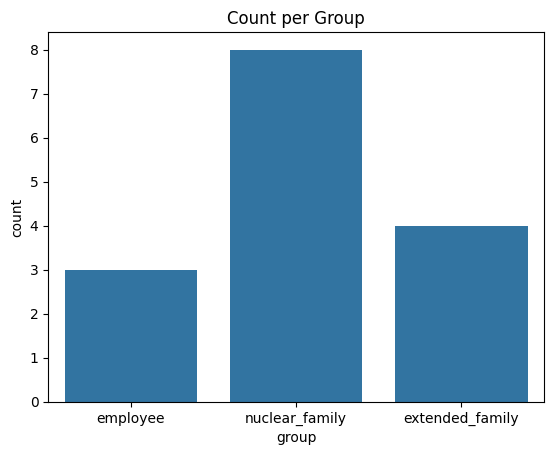

In [32]:
# plotting per group in the group column of the people dataframe
sns.countplot(x='group', data=people_df)
plt.title('Count per Group')
plt.show()

Count by Country

In [ ]:
people_df['country'].value_counts()

country
UK              3
India           3
South Africa    3
Australia       3
USA             2
Brazil          1
Name: count, dtype: int64

In [ ]:
people_df['country'].value_counts().index    #you’re telling pandas to give me the country names (the index labels), without their counts.
                                            #.index gives you an array of the country names

Index(['UK', 'India', 'South Africa', 'Australia', 'USA', 'Brazil'], dtype='object', name='country')

In [ ]:
people_df['country'].value_counts().values  #.values gives you an array of counts for each country.

array([3, 3, 3, 3, 2, 1], dtype=int64)

<Axes: xlabel='country', ylabel='count'>

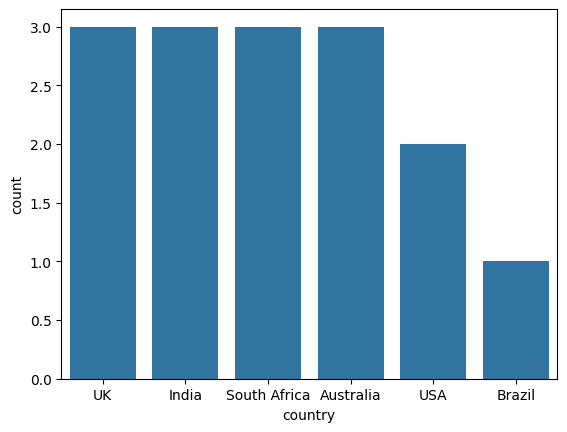

In [ ]:
order = people_df['country'].value_counts().index

sns.countplot(x='country', data=people_df, order = order)    # order sorts the bars by frequency from the most frequency to least frequency

In [ ]:
people_df.columns  

Index(['person_id', 'name', 'group', 'age', 'country',
       'financial_responsibility', 'loyalty_score', 'leadership_potential',
       'philanthropy_alignment', 'legal_flags'],
      dtype='object')

In [96]:
people_df[['financial_responsibility', 'loyalty_score', 'leadership_potential','philanthropy_alignment']]

,financial_responsibility,loyalty_score,leadership_potential,philanthropy_alignment
0,91,68,44,90
1,58,62,53,32
2,63,83,59,67
3,60,72,87,51
4,88,66,88,71
5,55,54,91,91
6,83,94,93,32
7,60,48,68,47
8,53,89,38,82
9,86,99,100,73


In [47]:
# finding if there is any correlation between financial_responsibility, loyalty_score, leadership_potential and philanthropy_alignment
corr_columns = ['financial_responsibility', 'loyalty_score', 'leadership_potential','philanthropy_alignment']
corr_df = people_df[corr_columns].corr()
corr_df

,financial_responsibility,loyalty_score,leadership_potential,philanthropy_alignment
financial_responsibility,1.000000,-0.087187,0.450292,0.027106
loyalty_score,-0.087187,1.000000,-0.094265,0.012360
leadership_potential,0.450292,-0.094265,1.000000,-0.279573
philanthropy_alignment,0.027106,0.012360,-0.279573,1.000000


<Axes: >

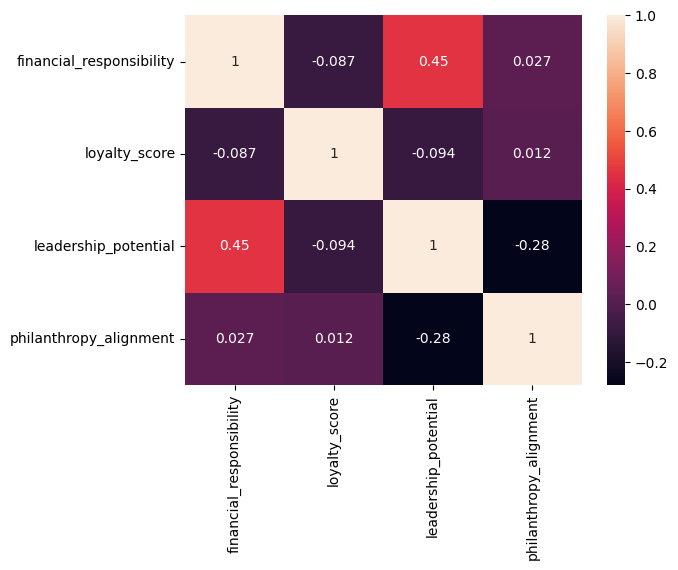

In [51]:
sns.heatmap(corr_df, annot=True)

Relationship between Age and Financial Resposnibility

Text(0, 0.5, 'F/R')

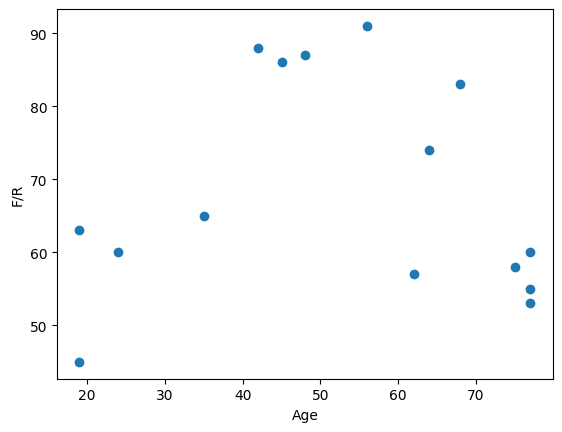

In [53]:
plt.scatter(x='age', y='financial_responsibility', data=people_df)
plt.xlabel("Age")
plt.ylabel("F/R")

### Assests Data

In [54]:
asset_df.head()

,asset_id,asset_name,asset_type,region,current_value_million_usd,risk_level,liquidity,mgmt_expertise_required
0,1,Global Tech Stocks,stocks,Asia,144.06,Medium,Medium,1
1,2,Paris Luxury Hotel,stocks,Europe,74.76,Medium,High,1
2,3,Kenyan Tea Plantation,cash,Asia,41.90,Low,Medium,1
3,4,Silicon Valley Startup Shares,real_estate,Latin America,387.26,Medium,High,0
4,5,Dubai Art Collection,business_unit,Latin America,7.73,Low,Medium,1


In [56]:
asset_type = asset_df.groupby(['asset_type'])['current_value_million_usd'].sum().sort_values(ascending=False)
asset_type

asset_type
real_estate       819.50
cash              579.23
art_collection    386.78
stocks            218.82
business_unit     176.52
Name: current_value_million_usd, dtype: float64

Real estate ranks high with an asset of $819.50 million while Business unit ranks lowest with an asset valuation of $176.52 million

In [68]:
asset_type.index

Index(['real_estate', 'cash', 'art_collection', 'stocks', 'business_unit'], dtype='object', name='asset_type')

In [69]:
asset_type.values

array([819.5 , 579.23, 386.78, 218.82, 176.52])

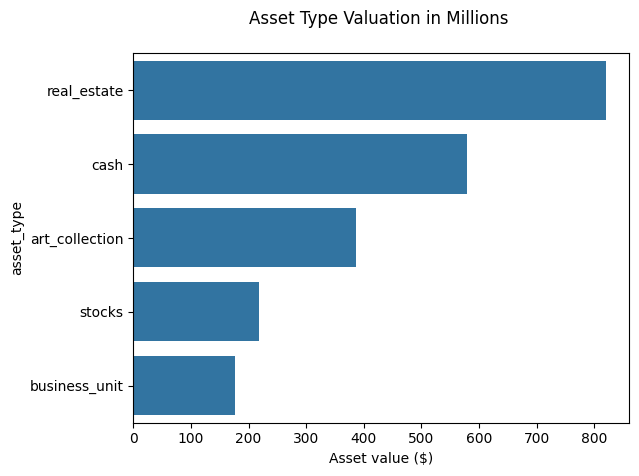

In [ ]:
# visualizing asset valuation using an horizontal barchart
sns.barplot(x=asset_type.values, y=asset_type.index, orient= 'h' )
plt.title('Asset Type Valuation in Millions \n')
plt.xlabel('Asset value ($)')
plt.show()

People in the Nuclear Family

In [71]:
people_df[people_df['group'] == 'nuclear_family'][['name', 'group']]

,name,group
1,Marcus Langley,nuclear_family
2,Rebecca Ortiz,nuclear_family
3,Daniel Smith,nuclear_family
5,Li Wei,nuclear_family
7,Carlos Mendes,nuclear_family
8,Fatima Zahra,nuclear_family
10,Sophia Brown,nuclear_family
11,Ahmed Khan,nuclear_family


Requirements for the person to manage the Billionaires wealth portfolio: 
- age >= 40
- financial_responsibility >= 70
- loyalty_score > 60
- leadership_potential >= 60
- philanthropy_alignment >= 50
- legal flags == 0

In [76]:
people_df[
    (people_df['age'] >= 40) &
    (people_df['financial_responsibility'] >= 70) &
    (people_df['loyalty_score'] >= 60) &
    (people_df['leadership_potential'] >= 60) &
    (people_df['philanthropy_alignment'] >= 50) &
    (people_df['legal_flags'] == 0)
]

,person_id,name,group,age,country,financial_responsibility,loyalty_score,leadership_potential,philanthropy_alignment,legal_flags
4,5,Priya Patel,employee,42,South Africa,88,66,88,71,0
9,10,John Doe,employee,45,Australia,86,99,100,73,0


##### **Analysis Report** #####
1. **People Age Distribution**
- Most people are aged 60 and above, with the largest group in the 70–75 range. 
- There are fewer people in their 30s to 50s, while a small cluster appears in the early 20s and around 60. 
- Overall, the distribution is uneven and leans toward older ages.


2. **People by Group**
- **Nuclear family** group has the highest number of members at **8**, followed by the **Extended Family** members at **4** and **Employees** at **3**.

3. **People by Country**
- Most people submitted for the potential rank heirs and managers, live in the **UK, India, South Africa, and Australia**.
- **USA and Brazil** have the least number of people at **2** and **1** respectively.

4. **Correlation between financial_responsibility, loyalty_score, leadership_potential and philanthropy_alignment**
- **Financial responsibility** and **Leadership potential** have a correlation of **0.45** (a moderate positive correlation).
        suggesting that people who are financially responsible also tend to show higher leadership potential.
- **Financial responsibility** and **Loyalty_score** have a correlation coefficient of **-0.087** (a very weak negative correlation).
        Suggesting that Financial responsibility and loyalty don’t have much of a linear relationship.
- Leadership potential and philanthropy alignment have a correlation coefficeint of **-0.28** (a weak to moderate negative correlation).
        Suggesting that higher leadership potential is somewhat associated with lower philanthropy alignment (maybe leaders focus more on efficiency than charity).
- Loyalty score and  Philanthropy alignment have a correlation of **0.012** (almost no correlation).
        Suggesting that Loyalty and philanthropy alignment don’t move together meaningfully.

- > This Suggests that we should look for a manager whose financial resposnibility and Leadership potential are higher that average

5. **Financial Responsibility by Age**
- Middle aged people with the **age (40 to 60)** have a **higher financial reponsibilities** probably because they are at the peak of their careers supporting families, paying mortgages, or planning for retirement.
- Those **above 60 and below 40 years** tend to have a **lower financial responsibility**. 
- Below 40 years: younger people generally have lower financial responsibilities probably because many are still in school, starting their careers, or just beginning to build families and assets. Their income levels may be lower, reducing the extent of financial commitments.
- Above 60 years: Most people in this group tend to be financially dependent on pensions, savings, or family support. Their major financial     responsibilities usually decline as they retire, children become independent, and mortgages are paid off.

- > This leads us to conlude that the best age for a portfolio manager for the Billionaire is between ages 40 and 60

6. **Asset Valuation**
- **Real estate** ranks high with an asset of **$819.50** million followed by **Cash** at **$579.23** million.
- **Business unit** ranks lowest with an asset valuation of **$176.52** million

7. **Potential Managers**
- Only two people (Employees) fulfill the requirements to manage the Billionaires estate. 
- Suprisingly, neither of the two that met the requirements were part of Bilionaires nuclear or extended family.
- The two Employees lie in the recommended age of between 40 and 60, and have a finacial reponsibility and leadership potential that is higher that average.